In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!pip install open3d pandas tqdm matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.7 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
# 0) Sanity: you should see a GPU
!nvidia-smi

Mon Nov 10 07:54:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# 1) Install CUDA 11.8 toolkit into the VM
!wget -q https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-keyring_1.1-1_all.deb
!dpkg -i cuda-keyring_1.1-1_all.deb
!apt-get update -qq
!apt-get install -y cuda-toolkit-11-8


(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.1-1_all.deb ...
Unpacking cuda-keyring (1.1-1) over (1.1-1) ...
Setting up cuda-keyring (1.1-1) ...
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  at-spi2-core cuda-cccl-11-8 cuda-command-line-tools-11-8 cuda-compiler-11-8
  cuda-cudart-11-8 cuda-cudart-dev-11-8 cuda-cuobjdump-11-8 cuda-cupti-11-8
  cuda-cupti-dev-11-8 cuda-cuxxfilt-11-8 cuda-documentation-11-8
  cuda-driver-dev-11-8 cuda-gdb-11-8 cuda-libraries-11-8
  cuda-libraries-dev-11-8 cuda-memcheck-11-8 cuda-nsight-11-8
  cuda-nsight-compute-11-8 cuda-nsight-systems-11-8 cuda-nvcc-11-8
  cuda-nvdisasm-11-8 cuda-nvml-dev-11-8 cuda-nvp

In [4]:
!export CUDA_HOME=/usr/local/cuda-11.8 && \
export PATH=$CUDA_HOME/bin:$PATH && \
export LD_LIBRARY_PATH=$CUDA_HOME/lib64:$LD_LIBRARY_PATH && \
nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [5]:
# 3) Install matching PyTorch (cu118) and build deps
!pip install -q torch==2.3.1+cu118 torchvision==0.18.1+cu118 torchaudio==2.3.1+cu118 -f https://download.pytorch.org/whl/torch_stable.html
!apt-get install -y ninja-build
!pip install -q ninja


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 101.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.5/728.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
# 4) Clean any failed builds
!rm -rf /root/.cache/torch_extensions


In [7]:
# 5) Build ONLY the PointNet2 CUDA ops (subdirectory install)
#    IMPORTANT: run in the *same cell* where CUDA_HOME is exported (or re-export it).
%%bash
export CUDA_HOME=/usr/local/cuda-11.8
export PATH=$CUDA_HOME/bin:$PATH
export LD_LIBRARY_PATH=$CUDA_HOME/lib64:$LD_LIBRARY_PATH
pip install -v "git+https://github.com/erikwijmans/Pointnet2_PyTorch.git#egg=pointnet2_ops&subdirectory=pointnet2_ops_lib"


Using pip 24.1.2 from /usr/local/lib/python3.12/dist-packages/pip (python 3.12)
  Cloning https://github.com/erikwijmans/Pointnet2_PyTorch.git to /tmp/pip-install-0f9mzsbf/pointnet2-ops_33c902f50be141979f1ab8ef88dac35a
  Resolved https://github.com/erikwijmans/Pointnet2_PyTorch.git to commit b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pointnet2_ops: filename=pointnet2_ops-3.0.0-cp312-cp312-linux_x86_64.whl size=8821570 sha256=9090357c1bb9d05a4a2c5dafb766d0c85a44547b0b3feeb7ea78c9c21d4d44f5
  Stored in directory: /tmp/pip-ephem-wheel-cache-vioxmfy2/wheels/e3/8a/f5/93316dcd272a2b99b20f871c7465287c7325c92039fb555162
Successfully built pointnet2_ops


  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none https://github.com/erikwijmans/Pointnet2_PyTorch.git /tmp/pip-install-0f9mzsbf/pointnet2-ops_33c902f50be141979f1ab8ef88dac35a
  Cloning into '/tmp/pip-install-0f9mzsbf/pointnet2-ops_33c902f50be141979f1ab8ef88dac35a'...
  Running command git rev-parse HEAD
  b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Running command git rev-parse HEAD
  b5ceb6d9ca0467ea34beb81023f96ee82228f626
  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-tw3gwxvn/pointnet2_ops.egg-info
  writing /tmp/pip-pip-egg-info-tw3gwxvn/pointnet2_ops.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-tw3gwxvn/pointnet2_ops.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-pip-egg-info-tw3gwxvn/pointnet2_ops.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-tw3gwxvn/pointnet2_ops.egg-info/top_level.txt
  writing manifest file '/tm

In [8]:
# 6) Verify versions and import
import os, torch
print("torch:", torch.__version__, "torch.cuda:", torch.version.cuda, "cuda.is_available:", torch.cuda.is_available())
print("CUDA_HOME:", os.environ.get("CUDA_HOME"))

from pointnet2_ops.pointnet2_modules import PointnetFPModule, PointnetSAModule
print("Import OK")


torch: 2.3.1+cu118 torch.cuda: 11.8 cuda.is_available: True
CUDA_HOME: None
Import OK


Epoch 1/100: 100%|██████████| 35/35 [00:53<00:00,  1.53s/it]


Epoch 1: Train Loss=0.5756, Val Loss=3.4297, Train Acc=0.725, Val Acc=0.324
Best model saved at epoch 1 with val loss 3.4297


Epoch 2/100: 100%|██████████| 35/35 [00:17<00:00,  2.01it/s]


Epoch 2: Train Loss=0.5210, Val Loss=0.5051, Train Acc=0.760, Val Acc=0.755
Best model saved at epoch 2 with val loss 0.5051


Epoch 3/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 3: Train Loss=0.4965, Val Loss=0.6071, Train Acc=0.774, Val Acc=0.716


Epoch 4/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 4: Train Loss=0.4783, Val Loss=0.4934, Train Acc=0.785, Val Acc=0.762
Best model saved at epoch 4 with val loss 0.4934


Epoch 5/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 5: Train Loss=0.4692, Val Loss=0.4673, Train Acc=0.787, Val Acc=0.776
Best model saved at epoch 5 with val loss 0.4673


Epoch 6/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 6: Train Loss=0.4615, Val Loss=0.4919, Train Acc=0.789, Val Acc=0.762


Epoch 7/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 7: Train Loss=0.4547, Val Loss=0.4694, Train Acc=0.792, Val Acc=0.787


Epoch 8/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 8: Train Loss=0.4569, Val Loss=0.4803, Train Acc=0.789, Val Acc=0.774


Epoch 9/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 9: Train Loss=0.4490, Val Loss=0.5352, Train Acc=0.794, Val Acc=0.747


Epoch 10/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 10: Train Loss=0.4436, Val Loss=0.4736, Train Acc=0.796, Val Acc=0.780


Epoch 11/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 11: Train Loss=0.4421, Val Loss=0.4719, Train Acc=0.796, Val Acc=0.785


Epoch 12/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 12: Train Loss=0.4305, Val Loss=0.4641, Train Acc=0.805, Val Acc=0.770
Best model saved at epoch 12 with val loss 0.4641


Epoch 13/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 13: Train Loss=0.4393, Val Loss=0.4968, Train Acc=0.797, Val Acc=0.763


Epoch 14/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 14: Train Loss=0.4352, Val Loss=0.4590, Train Acc=0.799, Val Acc=0.780
Best model saved at epoch 14 with val loss 0.4590


Epoch 15/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 15: Train Loss=0.4391, Val Loss=0.4709, Train Acc=0.798, Val Acc=0.777


Epoch 16/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 16: Train Loss=0.4251, Val Loss=0.4828, Train Acc=0.804, Val Acc=0.773


Epoch 17/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 17: Train Loss=0.4280, Val Loss=0.5260, Train Acc=0.803, Val Acc=0.763


Epoch 18/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 18: Train Loss=0.4222, Val Loss=0.4607, Train Acc=0.806, Val Acc=0.786


Epoch 19/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 19: Train Loss=0.4226, Val Loss=0.5068, Train Acc=0.806, Val Acc=0.773


Epoch 20/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 20: Train Loss=0.4308, Val Loss=0.4925, Train Acc=0.800, Val Acc=0.769


Epoch 21/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 21: Train Loss=0.4133, Val Loss=0.4532, Train Acc=0.810, Val Acc=0.786
Best model saved at epoch 21 with val loss 0.4532


Epoch 22/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 22: Train Loss=0.4045, Val Loss=0.5703, Train Acc=0.817, Val Acc=0.714


Epoch 23/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 23: Train Loss=0.4036, Val Loss=0.4695, Train Acc=0.815, Val Acc=0.777


Epoch 24/100: 100%|██████████| 35/35 [00:17<00:00,  2.02it/s]


Epoch 24: Train Loss=0.4026, Val Loss=0.5089, Train Acc=0.817, Val Acc=0.748


Epoch 25/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 25: Train Loss=0.4011, Val Loss=0.4417, Train Acc=0.819, Val Acc=0.789
Best model saved at epoch 25 with val loss 0.4417


Epoch 26/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 26: Train Loss=0.3958, Val Loss=0.4721, Train Acc=0.820, Val Acc=0.771


Epoch 27/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 27: Train Loss=0.4009, Val Loss=0.4784, Train Acc=0.817, Val Acc=0.780


Epoch 28/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 28: Train Loss=0.4007, Val Loss=0.4908, Train Acc=0.820, Val Acc=0.778


Epoch 29/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 29: Train Loss=0.3976, Val Loss=0.6511, Train Acc=0.817, Val Acc=0.675


Epoch 30/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 30: Train Loss=0.3900, Val Loss=0.4660, Train Acc=0.824, Val Acc=0.769


Epoch 31/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 31: Train Loss=0.3847, Val Loss=0.4884, Train Acc=0.826, Val Acc=0.763


Epoch 32/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 32: Train Loss=0.3881, Val Loss=0.4758, Train Acc=0.823, Val Acc=0.776


Epoch 33/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 33: Train Loss=0.3918, Val Loss=0.4775, Train Acc=0.824, Val Acc=0.774


Epoch 34/100: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


Epoch 34: Train Loss=0.3841, Val Loss=0.4682, Train Acc=0.827, Val Acc=0.790


Epoch 35/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 35: Train Loss=0.3829, Val Loss=0.5279, Train Acc=0.827, Val Acc=0.743


Epoch 36/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 36: Train Loss=0.3814, Val Loss=0.4839, Train Acc=0.827, Val Acc=0.769


Epoch 37/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 37: Train Loss=0.3869, Val Loss=0.5105, Train Acc=0.827, Val Acc=0.737


Epoch 38/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 38: Train Loss=0.3848, Val Loss=0.4710, Train Acc=0.827, Val Acc=0.771


Epoch 39/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 39: Train Loss=0.3730, Val Loss=0.5360, Train Acc=0.833, Val Acc=0.738


Epoch 40/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 40: Train Loss=0.3797, Val Loss=0.5395, Train Acc=0.829, Val Acc=0.743


Epoch 41/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 41: Train Loss=0.3717, Val Loss=0.4710, Train Acc=0.837, Val Acc=0.768


Epoch 42/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 42: Train Loss=0.3613, Val Loss=0.4794, Train Acc=0.840, Val Acc=0.759


Epoch 43/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 43: Train Loss=0.3664, Val Loss=0.4845, Train Acc=0.838, Val Acc=0.763


Epoch 44/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 44: Train Loss=0.3604, Val Loss=0.4829, Train Acc=0.841, Val Acc=0.769


Epoch 45/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 45: Train Loss=0.3526, Val Loss=0.4779, Train Acc=0.847, Val Acc=0.774


Epoch 46/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 46: Train Loss=0.3518, Val Loss=0.4948, Train Acc=0.845, Val Acc=0.758


Epoch 47/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 47: Train Loss=0.3508, Val Loss=0.4832, Train Acc=0.849, Val Acc=0.762


Epoch 48/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 48: Train Loss=0.3497, Val Loss=0.5235, Train Acc=0.848, Val Acc=0.748


Epoch 49/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 49: Train Loss=0.3481, Val Loss=0.5775, Train Acc=0.850, Val Acc=0.713


Epoch 50/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 50: Train Loss=0.3531, Val Loss=0.4832, Train Acc=0.845, Val Acc=0.772


Epoch 51/100: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


Epoch 51: Train Loss=0.3465, Val Loss=0.4895, Train Acc=0.847, Val Acc=0.771


Epoch 52/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 52: Train Loss=0.3401, Val Loss=0.5535, Train Acc=0.851, Val Acc=0.734


Epoch 53/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 53: Train Loss=0.3368, Val Loss=0.4952, Train Acc=0.854, Val Acc=0.770


Epoch 54/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 54: Train Loss=0.3394, Val Loss=0.4732, Train Acc=0.852, Val Acc=0.782


Epoch 55/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 55: Train Loss=0.3309, Val Loss=0.5407, Train Acc=0.857, Val Acc=0.738


Epoch 56/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 56: Train Loss=0.3314, Val Loss=0.4852, Train Acc=0.855, Val Acc=0.778


Epoch 57/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 57: Train Loss=0.3358, Val Loss=0.4901, Train Acc=0.855, Val Acc=0.770


Epoch 58/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 58: Train Loss=0.3254, Val Loss=0.5461, Train Acc=0.862, Val Acc=0.761


Epoch 59/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 59: Train Loss=0.3362, Val Loss=0.4881, Train Acc=0.856, Val Acc=0.769


Epoch 60/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 60: Train Loss=0.3290, Val Loss=0.4999, Train Acc=0.860, Val Acc=0.762


Epoch 61/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 61: Train Loss=0.3203, Val Loss=0.4817, Train Acc=0.864, Val Acc=0.777


Epoch 62/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 62: Train Loss=0.3096, Val Loss=0.4819, Train Acc=0.870, Val Acc=0.781


Epoch 63/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 63: Train Loss=0.3056, Val Loss=0.4970, Train Acc=0.872, Val Acc=0.774


Epoch 64/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 64: Train Loss=0.3057, Val Loss=0.5217, Train Acc=0.871, Val Acc=0.744


Epoch 65/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 65: Train Loss=0.3009, Val Loss=0.4853, Train Acc=0.875, Val Acc=0.771


Epoch 66/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 66: Train Loss=0.3018, Val Loss=0.4846, Train Acc=0.875, Val Acc=0.775


Epoch 67/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 67: Train Loss=0.2980, Val Loss=0.5463, Train Acc=0.877, Val Acc=0.736


Epoch 68/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 68: Train Loss=0.2968, Val Loss=0.4963, Train Acc=0.877, Val Acc=0.773


Epoch 69/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 69: Train Loss=0.2941, Val Loss=0.5963, Train Acc=0.880, Val Acc=0.728


Epoch 70/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 70: Train Loss=0.2923, Val Loss=0.5218, Train Acc=0.879, Val Acc=0.748


Epoch 71/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 71: Train Loss=0.2901, Val Loss=0.5505, Train Acc=0.881, Val Acc=0.759


Epoch 72/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 72: Train Loss=0.2928, Val Loss=0.5248, Train Acc=0.880, Val Acc=0.755


Epoch 73/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 73: Train Loss=0.2904, Val Loss=0.5131, Train Acc=0.879, Val Acc=0.759


Epoch 74/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 74: Train Loss=0.2929, Val Loss=0.5026, Train Acc=0.880, Val Acc=0.771


Epoch 75/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 75: Train Loss=0.2893, Val Loss=0.5422, Train Acc=0.881, Val Acc=0.764


Epoch 76/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 76: Train Loss=0.2837, Val Loss=0.5159, Train Acc=0.885, Val Acc=0.766


Epoch 77/100: 100%|██████████| 35/35 [00:16<00:00,  2.07it/s]


Epoch 77: Train Loss=0.2843, Val Loss=0.5844, Train Acc=0.885, Val Acc=0.735


Epoch 78/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 78: Train Loss=0.2820, Val Loss=0.5049, Train Acc=0.886, Val Acc=0.772


Epoch 79/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 79: Train Loss=0.2801, Val Loss=0.5479, Train Acc=0.885, Val Acc=0.754


Epoch 80/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 80: Train Loss=0.2800, Val Loss=0.5077, Train Acc=0.886, Val Acc=0.768


Epoch 81/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 81: Train Loss=0.2731, Val Loss=0.5191, Train Acc=0.889, Val Acc=0.756


Epoch 82/100: 100%|██████████| 35/35 [00:17<00:00,  2.03it/s]


Epoch 82: Train Loss=0.2675, Val Loss=0.5482, Train Acc=0.893, Val Acc=0.742


Epoch 83/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 83: Train Loss=0.2696, Val Loss=0.5404, Train Acc=0.892, Val Acc=0.750


Epoch 84/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 84: Train Loss=0.2707, Val Loss=0.5470, Train Acc=0.892, Val Acc=0.751


Epoch 85/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 85: Train Loss=0.2674, Val Loss=0.5000, Train Acc=0.893, Val Acc=0.772


Epoch 86/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 86: Train Loss=0.2670, Val Loss=0.5233, Train Acc=0.892, Val Acc=0.761


Epoch 87/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 87: Train Loss=0.2628, Val Loss=0.5482, Train Acc=0.896, Val Acc=0.756


Epoch 88/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 88: Train Loss=0.2615, Val Loss=0.5244, Train Acc=0.896, Val Acc=0.761


Epoch 89/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 89: Train Loss=0.2627, Val Loss=0.5527, Train Acc=0.895, Val Acc=0.755


Epoch 90/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 90: Train Loss=0.2597, Val Loss=0.5265, Train Acc=0.898, Val Acc=0.763


Epoch 91/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 91: Train Loss=0.2611, Val Loss=0.5182, Train Acc=0.895, Val Acc=0.768


Epoch 92/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 92: Train Loss=0.2557, Val Loss=0.5194, Train Acc=0.899, Val Acc=0.766


Epoch 93/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 93: Train Loss=0.2555, Val Loss=0.5166, Train Acc=0.900, Val Acc=0.763


Epoch 94/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 94: Train Loss=0.2546, Val Loss=0.5347, Train Acc=0.900, Val Acc=0.761


Epoch 95/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 95: Train Loss=0.2593, Val Loss=0.5128, Train Acc=0.898, Val Acc=0.773


Epoch 96/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 96: Train Loss=0.2571, Val Loss=0.5509, Train Acc=0.899, Val Acc=0.751


Epoch 97/100: 100%|██████████| 35/35 [00:16<00:00,  2.06it/s]


Epoch 97: Train Loss=0.2523, Val Loss=0.5416, Train Acc=0.901, Val Acc=0.757


Epoch 98/100: 100%|██████████| 35/35 [00:17<00:00,  2.05it/s]


Epoch 98: Train Loss=0.2566, Val Loss=0.5235, Train Acc=0.899, Val Acc=0.769


Epoch 99/100: 100%|██████████| 35/35 [00:17<00:00,  2.06it/s]


Epoch 99: Train Loss=0.2532, Val Loss=0.5576, Train Acc=0.901, Val Acc=0.749


Epoch 100/100: 100%|██████████| 35/35 [00:17<00:00,  2.04it/s]


Epoch 100: Train Loss=0.2506, Val Loss=0.5297, Train Acc=0.901, Val Acc=0.776


Testing: 100%|██████████| 11/11 [00:15<00:00,  1.39s/it]



--- Výsledky na testovacej množine ---
Accuracy: 0.7785
Precision: 0.7881
Recall:    0.5526
F1 score:  0.6497


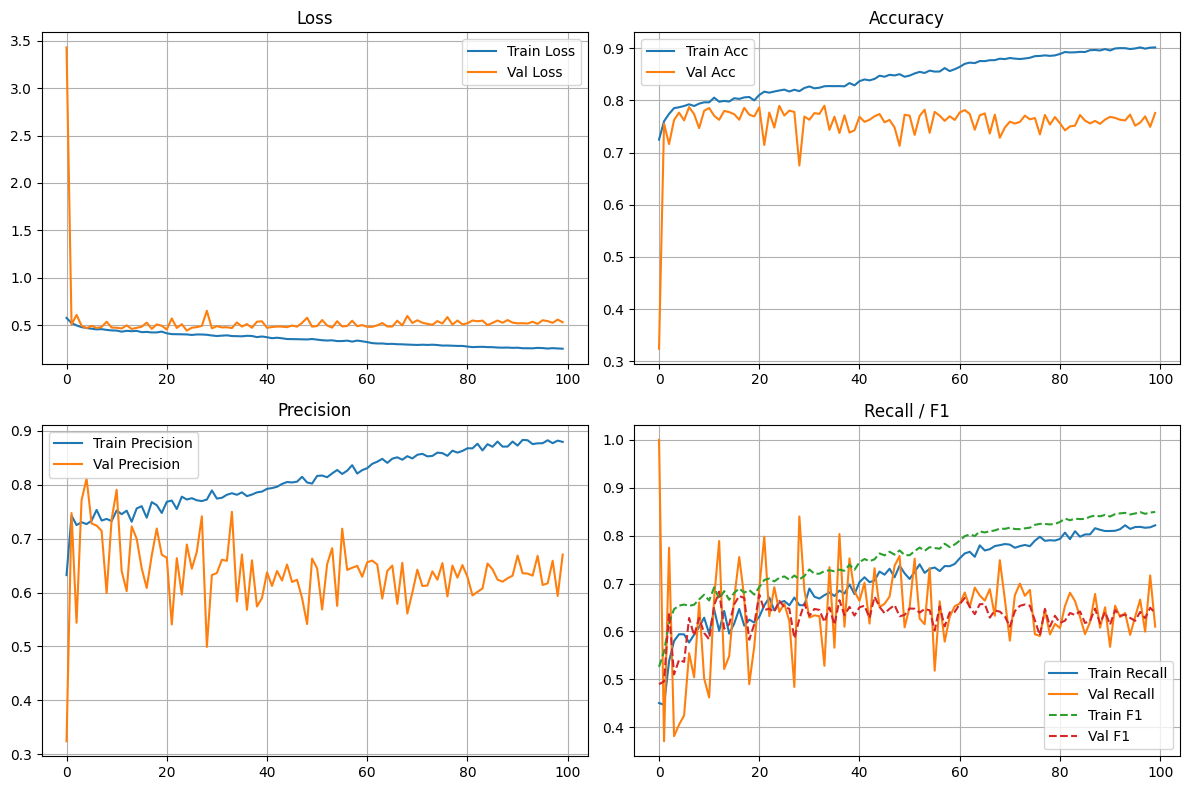

In [12]:
import os
import ast
import random
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import open3d as o3d
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from pointnet2_ops.pointnet2_modules import PointnetFPModule, PointnetSAModuleMSG


# =====================
#   HYPERPARAMETRE
# =====================
BATCH_SIZE = 2
LR = 0.0025
WEIGHT_DECAY = 1e-4
LR_DECAY_FACTOR = 0.5
LR_DECAY_STEP = 20
EPOCHS = 100
N_CLASSES = 2
N_POINTS = 62673
TRAIN_RATIO, VAL_RATIO, TEST_RATIO = 0.7, 0.1, 0.2
SEED = 42

# =====================
#   NASTAVENIA
# =====================
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

DATA_DIR = "/content/gdrive/MyDrive/diplomova_praca/dataset/normalized_centered_voxelized_models_0.0025/"
PC_INFO = os.path.join(DATA_DIR, "point_counts.csv")
LABEL_INFO = os.path.join(DATA_DIR, "voxel_labels_0.0025.csv")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =====================
#   DATASET
# =====================

class BranchSegmentationDataset(Dataset):
    def __init__(self, data_dir, pc_info_path, label_path, n_points):
        self.data_dir = data_dir
        self.pc_info = pd.read_csv(pc_info_path)
        self.labels_df = pd.read_csv(label_path)
        self.n_points = n_points

        # Map tree name (without _merged_teaser.ply) to label array
        self.labels_df['labels'] = self.labels_df['labels'].apply(ast.literal_eval)
        label_dict = dict(zip(self.labels_df['tree'], self.labels_df['labels']))

        self.pc_info = self.pc_info[self.pc_info['file_name'].str.replace('_voxelized.ply', '').isin(label_dict.keys())]
        self.files = self.pc_info['file_name'].tolist()
        self.labels = [label_dict[f.replace('_voxelized.ply', '')] for f in self.files]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        file_name = self.files[idx]
        label_array = np.array(self.labels[idx], dtype=np.int64)

        pcd = o3d.io.read_point_cloud(os.path.join(self.data_dir, file_name))
        pts = np.asarray(pcd.points, dtype=np.float32)

        # Match labels and points (downsample/upsample if needed)
        min_len = min(len(pts), len(label_array))
        pts, label_array = pts[:min_len], label_array[:min_len]

        if min_len > self.n_points:
            choice = np.random.choice(min_len, self.n_points, replace=False)
        else:
            choice = np.random.choice(min_len, self.n_points, replace=True)

        pts = pts[choice, :]
        label_array = label_array[choice]

        pts = torch.tensor(pts).float().T  # (3, N)
        labels = torch.tensor(label_array).long()  # (N,)
        return pts, labels


# =====================
#   MODEL (PointNet++)
# =====================
class PointNet2SemSegMSG(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.sa1 = PointnetSAModuleMSG(
          npoint=1024,
          radii=[0.1, 0.2, 0.4],
          nsamples=[16, 32, 128],
          mlps=[[0, 32, 32, 64],
                [0, 64, 64, 128],
                [0, 64, 96, 128]],
          use_xyz=True
        )

        self.sa2 = PointnetSAModuleMSG(
          npoint=256,
          radii=[0.4, 0.8],
          nsamples=[32, 64],
          mlps=[[320, 128, 128, 256],
                [320, 128, 196, 256]],
          use_xyz=True
        )


        self.fp1 = PointnetFPModule(mlp=[512 + 320, 256, 256])  # correct: 832 input channels
        self.fp2 = PointnetFPModule(mlp=[256, 256, 128, num_classes])

    def forward(self, xyz):
        xyz = xyz.transpose(1, 2).contiguous()  # (B, N, 3)
        l1_xyz, l1_features = self.sa1(xyz, None)
        l2_xyz, l2_features = self.sa2(l1_xyz, l1_features)

        l1_features = self.fp1(l1_xyz, l2_xyz, l1_features, l2_features)
        l0_features = self.fp2(xyz, l1_xyz, None, l1_features)

        return l0_features  # (B, num_classes, N)
# =====================
#   DÁTA A LOADERY
# =====================
dataset = BranchSegmentationDataset(DATA_DIR, PC_INFO, LABEL_INFO, N_POINTS)

train_len = int(TRAIN_RATIO * len(dataset))
val_len = int(VAL_RATIO * len(dataset))
test_len = len(dataset) - train_len - val_len
train_ds, val_ds, test_ds = random_split(dataset, [train_len, val_len, test_len])

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

# =====================
#   TRÉNING
# =====================
model = PointNet2SemSegMSG(num_classes=N_CLASSES).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=LR_DECAY_STEP, gamma=LR_DECAY_FACTOR)

train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_precisions, val_precisions = [], []
train_recalls, val_recalls = [], []
train_f1s, val_f1s = [], []
best_val_loss = float('inf')

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0
    all_preds, all_labels = [], []

    for pts, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}"):
        pts, labels = pts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(pts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)  # (B, N)
        all_preds.extend(preds.cpu().numpy().ravel())
        all_labels.extend(labels.cpu().numpy().ravel())


    # metriky pre tréning
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accs.append(accuracy_score(all_labels, all_preds))
    train_precisions.append(precision_score(all_labels, all_preds, average='binary', zero_division=0))
    train_recalls.append(recall_score(all_labels, all_preds, average='binary', zero_division=0))
    train_f1s.append(f1_score(all_labels, all_preds, average='binary', zero_division=0))

    # =====================
    # Validácia
    # =====================
    model.eval()
    val_loss = 0
    val_preds, val_labels_all = [], []

    with torch.no_grad():
        for pts, labels in val_loader:
            pts, labels = pts.to(device), labels.to(device)
            outputs = model(pts)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy().flatten())
            val_labels_all.extend(labels.cpu().numpy().flatten())

    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    val_accs.append(accuracy_score(val_labels_all, val_preds))
    val_precisions.append(precision_score(val_labels_all, val_preds, average='binary', zero_division=0))
    val_recalls.append(recall_score(val_labels_all, val_preds, average='binary', zero_division=0))
    val_f1s.append(f1_score(val_labels_all, val_preds, average='binary', zero_division=0))

    scheduler.step()

    print(f"Epoch {epoch+1}: "
          f"Train Loss={avg_train_loss:.4f}, Val Loss={avg_val_loss:.4f}, "
          f"Train Acc={train_accs[-1]:.3f}, Val Acc={val_accs[-1]:.3f}")
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        metrics = {
          "train_losses": train_losses,
          "val_losses": val_losses,
          "train_accs": train_accs,
          "val_accs": val_accs,
          "train_precisions": train_precisions,
          "val_precisions": val_precisions,
          "train_recalls": train_recalls,
          "val_recalls": val_recalls,
          "train_f1s": train_f1s,
          "val_f1s": val_f1s
        }
        torch.save(metrics, "/content/gdrive/MyDrive/diplomova_praca/training_metrics.pt")

        torch.save(model.state_dict(),
                   "/content/gdrive/MyDrive/diplomova_praca/best_pointnet2_model.pth")
        print(f"Best model saved at epoch {epoch+1} with val loss {avg_val_loss:.4f}")

# =====================
#   TESTOVANIE
# =====================
model.eval()
test_preds, test_labels_all = [], []
with torch.no_grad():
    for pts, labels in tqdm(test_loader, desc="Testing"):
        pts, labels = pts.to(device), labels.to(device)
        outputs = model(pts)
        _, preds = torch.max(outputs, 1)
        test_preds.extend(preds.cpu().numpy().flatten())
        test_labels_all.extend(labels.cpu().numpy().flatten())

test_acc = accuracy_score(test_labels_all, test_preds)
test_prec = precision_score(test_labels_all, test_preds, average='binary', zero_division=0)
test_rec = recall_score(test_labels_all, test_preds, average='binary', zero_division=0)
test_f1 = f1_score(test_labels_all, test_preds, average='binary', zero_division=0)

print(f"\n--- Výsledky na testovacej množine ---")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_prec:.4f}")
print(f"Recall:    {test_rec:.4f}")
print(f"F1 score:  {test_f1:.4f}")

# =====================
#   VIZUALIZÁCIA
# =====================
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Loss
axs[0, 0].plot(train_losses, label='Train Loss')
axs[0, 0].plot(val_losses, label='Val Loss')
axs[0, 0].set_title('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Accuracy
axs[0, 1].plot(train_accs, label='Train Acc')
axs[0, 1].plot(val_accs, label='Val Acc')
axs[0, 1].set_title('Accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Precision
axs[1, 0].plot(train_precisions, label='Train Precision')
axs[1, 0].plot(val_precisions, label='Val Precision')
axs[1, 0].set_title('Precision')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Recall/F1
axs[1, 1].plot(train_recalls, label='Train Recall')
axs[1, 1].plot(val_recalls, label='Val Recall')
axs[1, 1].plot(train_f1s, '--', label='Train F1')
axs[1, 1].plot(val_f1s, '--', label='Val F1')
axs[1, 1].set_title('Recall / F1')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/diplomova_praca/metrics_plot_original.png", dpi=300)
plt.show()